<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [ ]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [ ]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


## Prepare Model

### Load Data

In [ ]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()


### Prepare Data

In [ ]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



## Find optimal hyper parameters

In [ ]:
# canswim_model.find_model()


In [ ]:
# canswim_model.load_model()


## Build Model
  * Using optimal hyper parameters from study above

In [ ]:

def build_new_model():
    canswim_model.build(            
                input_chunk_length=252,
                output_chunk_length=42,
                hidden_size=1536,
                num_encoder_layers=3,
                num_decoder_layers=3,
                decoder_output_dim=8,
                temporal_decoder_hidden=64,
                use_layer_norm=True,
                use_reversible_instance_norm=True,
                dropout=0.2,
                optimizer_kwargs={"lr": 3.5e-05},
    )
                # force_reset=False,
                # save_checkpoints=False)


## Train model

### Run model training loop

In [ ]:
from darts.metrics import quantile_loss
import numpy as np


def plot_backtest_results():
    # backtest on 3 stocks
    for i in range(min(len(canswim_model.targets_list),3)):
        start_list = canswim_model.get_val_start_list()
        backtest = canswim_model.backtest(target=canswim_model.targets_list[i], start=start_list[i],
                                                    past_covariates=canswim_model.past_cov_list[i], future_covariates=canswim_model.future_cov_list[i],
                                                    forecast_horizon=canswim_model.pred_horizon)        
        # print(f"target series: \n{target}")
        # print(f"backtest series: \n{backtest}")
        loss_vals = []
        for p, b in enumerate(backtest):
            loss = quantile_loss(canswim_model.targets_list[i], b, n_jobs=-1, verbose=True)
            print(f"quantile loss: {loss} at prediction step {p}")
            loss_vals.append(loss)
        mean_loss = np.mean(loss_vals)
        print(f"Mean Backtest Quantile Loss across all prediction periods: {mean_loss}")
        canswim_model.plot_backtest_results(target=canswim_model.targets_list[i], 
                                            backtest=backtest, 
                                            start=start_list[i],
                                            forecast_horizon=canswim_model.pred_horizon)        


 

In [ ]:
from darts.models import TiDEModel
from canswim.hfhub import HFHub
hfhub = HFHub()
repo_id = "ivelin/canswim"

In [ ]:
canswim_model.download_model(repo_id=repo_id)    # prepare next sample subset


In [ ]:
canswim_model.load_data()


/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(
/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
preparing model data
preparing past covariates
preparing past covariates: price and volume
preparing past covariates: earnings estimates 
stacking covariates
preparing past covariates: key metrics
stacking covariates
preparing past covariates: institutional ownership of symbol
stacking covariates
preparing past covariates: broad market indecies


/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(


stacking covariates
preparing future covariates
preparing future covariates: analyst estimates
preparing future covariates: analyst estimates[quarter]
preparing future covariates: analyst estimates[annual]
No analyst estimates available for MMYT
stacking covariates
Skipping MMYT covariates stack due to error:  'MMYT'
preparing future covariates: holidays
Removing time series for tickers with incomplete data sets: {'MMYT'}. Keeping {'FTAI', 'META', 'TDW', 'DXCM', 'LPG', 'ELF', 'TEAM', 'NTRA', 'RCL', 'NVO', 'XP', 'CELH', 'LULU', 'CRWD', 'SMCI', 'NET', 'MELI', 'JPM', 'CCL', 'URI', 'ITCI', 'ZS', 'OZK', 'DDOG', 'STNE', 'BKNG', 'PDD', 'RYAAY', 'NVDA', 'NOW', 'KKR', 'ANET', 'WDAY', 'FIX', 'FRPT', 'ASND', 'AAON', 'CRM', 'AMPH', 'AXON'} 
Preparing train, val, test splits
preparing train, val and test splits
Removing AXON from train set. Not enough samples. Minimum 882 needed, but only 807 available
sample train series start time: 1995-01-02 00:00:00, length: 39
sample val series start time: 202

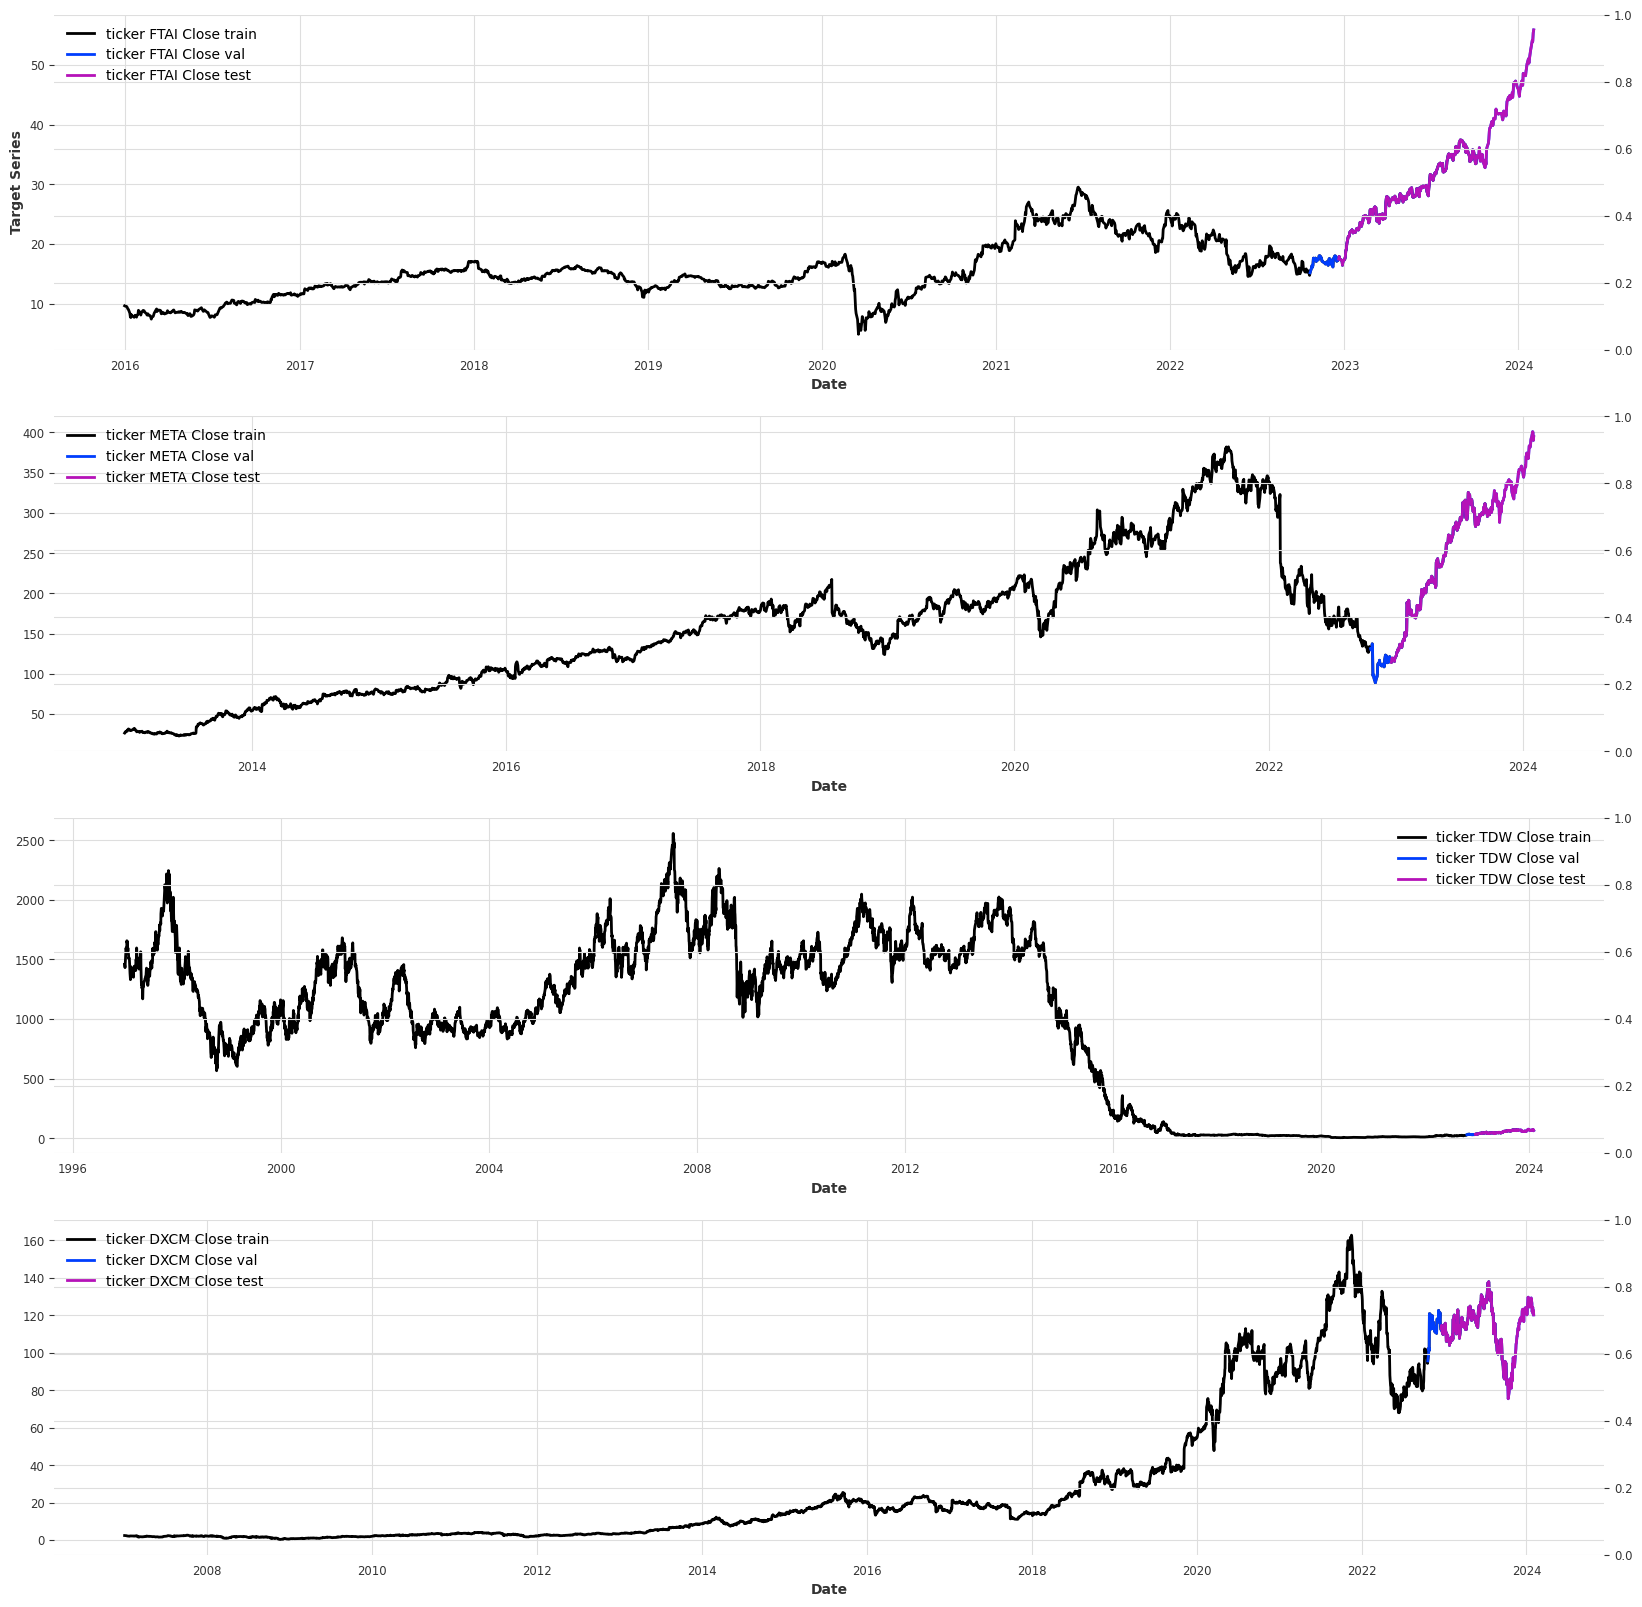

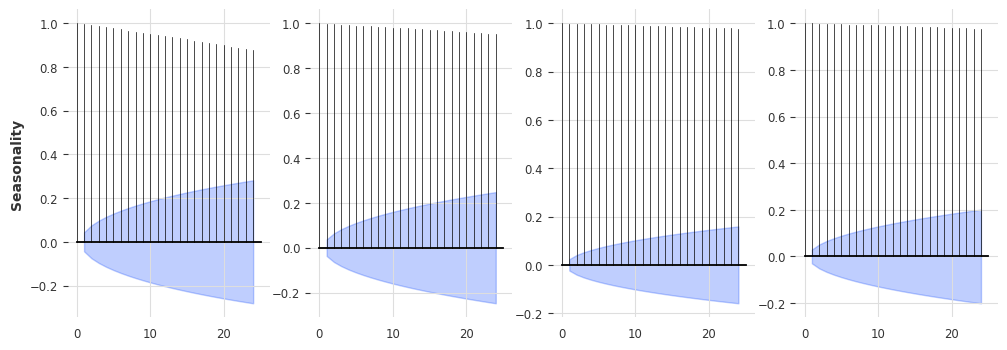

In [12]:
prepare_data()


In [13]:
targets = canswim_model.target_train_list[0].pd_dataframe()
past_covs = canswim_model.past_cov_list[0].pd_dataframe()
future_covs = canswim_model.future_cov_list[0].pd_dataframe()

In [14]:
# build_new_model()

In [15]:
import os
from dotenv import load_dotenv


global n_outer_train_loop
n_outer_train_loop = 1

def get_env():
    load_dotenv(override=True)
    global n_outer_train_loop
    n_outer_train_loop = int(os.getenv("n_outer_train_loop", 1))

get_env()

print("n_outer_train_loop:", n_outer_train_loop, type(n_outer_train_loop))

# train loop
i = 0
while i < n_outer_train_loop:
    print(f'Outer train loop: {i}')
    # load a new data sample from external source
    canswim_model.load_data()
    # prepare timeseries for training
    canswim_model.prepare_data()
    # train model
    canswim_model.train()
    # push to hf hub
    canswim_model.upload_model(repo_id=repo_id)
    # load back latest model weights from hf hub
    canswim_model.download_model(repo_id=repo_id)    # prepare next sample subset
    # refresh any config changes in the OS environment
    i += 1
    get_env()


n_outer_train_loop: 100 <class 'int'>
Outer train loop: 0
n_stocks:  50
n_epochs:  20
Stocks train list:  IBD50.csv
Loaded 50 symbols in total
Training loop stock subset has 50 tickers: 
 ['DASH', 'KKR', 'DDOG', 'ELF', 'DXCM', 'IMCR', 'MMYT', 'LULU', 'FTAI', 'JPM', 'CELH', 'BKNG', 'CCL', 'ITCI', 'ZS', 'SMCI', 'S', 'AMPH', 'NVDA', 'STNE', 'AXON', 'PDD', 'OZK', 'FIX', 'NOW', 'NTRA', 'TDW', 'IOT', 'XP', 'NET', 'TEAM', 'AAON', 'RCL', 'RYAAY', 'MNDY', 'ASND', 'GCT', 'ANET', 'LPG', 'WDAY', 'MELI', 'NVO', 'SNOW', 'GTLB', 'META', 'FROG', 'CRM', 'FRPT', 'CRWD', 'URI']
Loading data from: data/data-3rd-party/all_stocks_price_hist_1d.parquet
filtered data loaded
price history loaded for 50 stocks: 
['AAON', 'AMPH', 'ANET', 'ASND', 'AXON', 'BKNG', 'CCL', 'CELH', 'CRM', 'CRWD', 'DASH', 'DDOG', 'DXCM', 'ELF', 'FIX', 'FROG', 'FRPT', 'FTAI', 'GCT', 'GTLB', 'IMCR', 'IOT', 'ITCI', 'JPM', 'KKR', 'LPG', 'LULU', 'MELI', 'META', 'MMYT', 'MNDY', 'NET', 'NOW', 'NTRA', 'NVDA', 'NVO', 'OZK', 'PDD', 'RCL', 'RYAAY

/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(
/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray

Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
preparing model data
preparing past covariates
preparing past covariates: price and volume
preparing past covariates: earnings estimates 
stacking covariates
preparing past covariates: key metrics
stacking covariates
preparing past covariates: institutional ownership of symbol
stacking covariates
preparing past covariates: broad market indecies


/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/timeseries.py:716: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xa = xr.DataArray(


stacking covariates
preparing future covariates
preparing future covariates: analyst estimates
preparing future covariates: analyst estimates[quarter]
preparing future covariates: analyst estimates[annual]
No analyst estimates available for MMYT
stacking covariates
Skipping MMYT covariates stack due to error:  'MMYT'
preparing future covariates: holidays
Removing time series for tickers with incomplete data sets: {'MMYT'}. Keeping {'FTAI', 'META', 'TDW', 'DXCM', 'LPG', 'ELF', 'TEAM', 'NTRA', 'RCL', 'NVO', 'XP', 'CELH', 'LULU', 'CRWD', 'SMCI', 'NET', 'MELI', 'JPM', 'CCL', 'URI', 'ITCI', 'ZS', 'OZK', 'DDOG', 'STNE', 'BKNG', 'PDD', 'RYAAY', 'NVDA', 'NOW', 'KKR', 'ANET', 'WDAY', 'FIX', 'FRPT', 'ASND', 'AAON', 'CRM', 'AMPH', 'AXON'} 
Preparing train, val, test splits
preparing train, val and test splits
Removing AXON from train set. Not enough samples. Minimum 882 needed, but only 807 available
sample train series start time: 1995-01-02 00:00:00, length: 39
sample val series start time: 202

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at /home/ivelin/canswim/darts_logs/canswim_model.pt/checkpoints/best-epoch=2-val_loss=4.41.ckpt


FileNotFoundError: Checkpoint file not found: /home/ivelin/canswim/darts_logs/canswim_model.pt/checkpoints/best-epoch=2-val_loss=4.41.ckpt

In [ ]:
canswim_model.targets.all_stock_tickers

In [ ]:
# backtest and plot results
plot_backtest_results()


In [ ]:

# quick test progress at modelcheckpoint
# preds = canswim_model.test()
# canswim_model.plot_test_results(preds)
